In [1]:
import pennylane as qml
from pennylane import numpy as np
from pennylane.optimize import GradientDescentOptimizer,AdamOptimizer,MomentumOptimizer
from sklearn.preprocessing import scale, normalize, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import random
# %matplotlib qt

In [2]:
# PCA on the dataset k > 2 
k=2
pca = PCA(n_components=k)

# Load the real distribution of a particular species
iris_fulldata = load_iris()
iris_dataset = iris_fulldata.data
# N = normalize
# iris_dataset = N(iris_dataset)
# print(iris_dataset)
print("Loading Iris Data....")
pca.fit(iris_dataset)
print("Mean = ", pca.mean_)

print("Variance Ratio = ", pca.explained_variance_ratio_)
print("Components = ", pca.components_)
X = pca.transform(iris_dataset)

species_value = 1 # Pick a number / species for the real distribution
print("Picking : Iris-",iris_fulldata['target_names'][species_value],"as real data distribution")
species_ind = [i for i, e in enumerate(iris_fulldata['target']) if e == species_value]

Loading Iris Data....
Mean =  [5.84333333 3.05733333 3.758      1.19933333]
Variance Ratio =  [0.92461872 0.05306648]
Components =  [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
Picking : Iris- versicolor as real data distribution


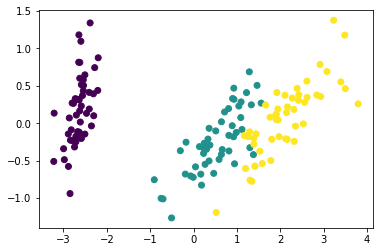

In [3]:
plt.scatter(X[:,0], X[:,1],c=iris_fulldata.target)
plt.show()

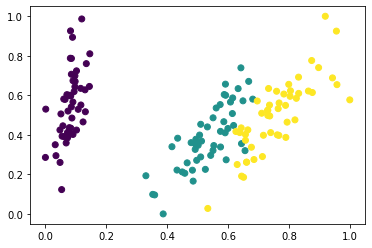

In [4]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
plt.scatter(X[:,0], X[:,1],c=iris_fulldata.target)
plt.show()

In [5]:
# # print(X)
# #generate descaler
# X_scaled = X
# pca_descaler = [[] for _ in range(k)]
# for i in range(k):
#     if X_scaled[:,i].min() < 0:
#         pca_descaler[i].append(X_scaled[:,i].min())
#         X_scaled[:,i] += np.abs(X_scaled[:,i].min())
#     else:
#         pca_descaler[i].append(X_scaled[:,i].min())
#         X_scaled[:,i] -= X_scaled[:,i].min()
#     pca_descaler[i].append(X_scaled[:,i].max())
#     X_scaled[:,i] /= X_scaled[:,i].max()   

# def descale_points(d_point,scales=pca_descaler,tfrm=pca):
#     for col in range(d_point.shape[1]):
#         d_point[:,col] *= scales[col][1]
#         d_point[:,col] += scales[col][0]
#     reconstruction = tfrm.inverse_transform(d_point)
#     return reconstruction

In [6]:
# Extract relavant data from the dataset
x_in = X[species_ind[0]: species_ind[-1] + 1]
pca_data = 2*np.arcsin(np.sqrt(x_in)) 
# plt.scatter(X[:,0], X[:,1])
# plt.scatter(x_in[:,0], x_in[:,1])
# plt.show()
print(x_in)

[[0.6423053  0.73902687]
 [0.59211089 0.60008449]
 [0.66787378 0.67050857]
 [0.48538302 0.16590514]
 [0.61427997 0.50776237]
 [0.55068036 0.32109112]
 [0.61527113 0.58687859]
 [0.35254633 0.09888892]
 [0.60801574 0.56600604]
 [0.45802146 0.20562927]
 [0.38691966 0.        ]
 [0.53216459 0.44012499]
 [0.49701624 0.2711734 ]
 [0.59958241 0.43223274]
 [0.4344897  0.38297909]
 [0.59145161 0.65646258]
 [0.55333224 0.34581606]
 [0.49290317 0.3531486 ]
 [0.59385535 0.27378346]
 [0.46571043 0.25837182]
 [0.61829452 0.44745961]
 [0.5102526  0.45340317]
 [0.64420833 0.35535434]
 [0.59057806 0.4102945 ]
 [0.56110629 0.53596746]
 [0.58750737 0.60393688]
 [0.6490293  0.57209625]
 [0.68119389 0.58082859]
 [0.5751298  0.41763787]
 [0.41573347 0.34002374]
 [0.44956195 0.21241292]
 [0.43225347 0.22183871]
 [0.47870315 0.36056425]
 [0.65586773 0.32006564]
 [0.54303551 0.29607705]
 [0.57421344 0.5530599 ]
 [0.63316858 0.63390318]
 [0.57538688 0.33859393]
 [0.4943068  0.37780125]
 [0.48297479 0.22121754]


In [7]:
# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X[:,0], X[:,1], X[:,2])
# ax.scatter(x_in[:,0], x_in[:,1], x_in[:,2])
# plt.show()

In [8]:
dev = qml.device("default.qubit", wires=k+1)
gen_dev = qml.device("default.qubit", wires=k+1)

In [9]:
def real(x_in_l):
#     qml.Rot(phi, theta, omega, wires=0)
    real_data_len = len(x_in_l)
    for i in range(real_data_len):
        qml.RY(x_in_l[i], wires=i)

In [10]:
def generator(w):
    W = np.reshape(w, (layers, k))
    for h in range(len(W[0])):
        qml.Hadamard(wires=h)
    for i in range(layers):
        for j in range(len(W[i])):
            qml.RY(W[i][j], wires=j)
#         if i % 2 == 0:
        for l in range(1, len(W[i])):
            qml.CNOT(wires=[l-1, l])
#     qml.RY(w[0], wires=0)
#     qml.RY(w[1], wires=1)
#     qml.CNOT(wires=[0,1])
#     qml.RY(w[2], wires=0)
#     qml.RY(w[3], wires=1)
#     qml.CNOT(wires=[0,1])
#     qml.RY(w[4], wires=0)
#     qml.RY(w[5], wires=1)
#     qml.CNOT(wires=[0,1])
#     qml.RY(w[6], wires=0)
#     qml.RY(w[7], wires=1)
#     qml.RX(w[0], wires=0)
#     qml.RX(w[1], wires=1)
#     qml.RY(w[2], wires=0)
#     qml.RY(w[3], wires=1)
#     qml.RZ(w[4], wires=0)
#     qml.RZ(w[5], wires=1)
#     qml.CNOT(wires=[0, 1])
#     qml.RX(w[6], wires=0)
#     qml.RY(w[7], wires=0)
#     qml.RZ(w[8], wires=0)

In [11]:
def discriminator(w):
    W = np.reshape(w, (layers, k))
    for i in range(layers):
        for j in range(len(W[i])):
            qml.RY(W[i][j], wires=j)
#         if i % 2 == 0:
        for l in range(1, len(W[i])):
            qml.CNOT(wires=[l-1, l])
#     qml.RY(w[0], wires=0)
#     qml.RY(w[1], wires=1)
#     qml.CNOT(wires=[0,1])
#     qml.RY(w[2], wires=0)
#     qml.RY(w[3], wires=1)
#     qml.CNOT(wires=[0,1])
#     qml.RY(w[4], wires=0)
#     qml.RY(w[5], wires=1)
#     qml.CNOT(wires=[0,1])
#     qml.RY(w[6], wires=0)
#     qml.RY(w[7], wires=1)
#     qml.RX(w[0], wires=0)
#     qml.RX(w[1], wires=2)
#     qml.RY(w[2], wires=0)
#     qml.RY(w[3], wires=2)
#     qml.RZ(w[4], wires=0)
#     qml.RZ(w[5], wires=2)
#     qml.CNOT(wires=[1, 2])
#     qml.RX(w[6], wires=2)
#     qml.RY(w[7], wires=2)
#     qml.RZ(w[8], wires=2)

In [12]:
# For real data set
@qml.qnode(dev,diff_method="parameter-shift")
def real_disc_circuit(x_in_l, disc_weights):
    real(x_in_l)
    discriminator(disc_weights)
    return qml.expval(qml.PauliZ(0))

# For Generated data set
@qml.qnode(dev,diff_method="parameter-shift")
def gen_disc_circuit(gen_weights, disc_weights):
    generator(gen_weights)
    discriminator(disc_weights)
    return qml.expval(qml.PauliZ(0))

# Exract Synthetic data from Generator:
gen_dev.shots = 20
@qml.qnode(gen_dev)
def gen_data(gen_weights):
    generator(gen_weights)
    exp = [qml.sample(qml.PauliZ(i)) for i in range(k)]
    return exp

In [13]:
def prob_real_true(x_in_l, disc_weights):
    true_disc_output = real_disc_circuit(x_in_l, disc_weights)
    # convert to probability
    prob_real_true = (true_disc_output + 1) / 2
    return prob_real_true

# def prob_fakeReal_true(x_in_f, disc_weights):
#     fake_disc_output = real_disc_circuit(x_in_l, disc_weights)
#     # convert to probability
#     prob_fake_true = (fake_disc_output + 1) / 2
#     return prob_fake_true

def prob_fake_true(gen_weights, disc_weights):
    fake_disc_output = gen_disc_circuit(gen_weights, disc_weights)
    # convert to probability
    prob_fake_true = (fake_disc_output + 1) / 2
    return prob_fake_true  # generator wants to minimize this prob


def disc_cost(x_in_l, gen_weights, disc_weights):
    cost = prob_fake_true(gen_weights, disc_weights) - prob_real_true(x_in_l, disc_weights)
#     cost = -1 * (np.log(1 - prob_fake_true(gen_weights, disc_weights)) + np.log(prob_real_true(x_in_l, disc_weights)))
    return cost


def gen_cost(gen_weights, disc_weights):
#     return np.log(1 - prob_fake_true(gen_weights, disc_weights))
    return -prob_fake_true(gen_weights, disc_weights)

In [14]:
def update_weights(init_value, lr, grad, neg=False):
    j = len(grad) - 1
    for i in range(len(init_value)):
        while lr*grad[0][j-i] > 2*np.pi:
            lr /= 10
            print("Warning - Gradient taking steps that are very large. Drop learning rate" , lr*grad[0][j-i])
        weight_update = lr*grad[0][j-i]
        new_value = init_value[i]
        # print("Updating with a new value of " + str(weight_update))
        if neg: 
            if new_value+weight_update > 2*np.pi:
                new_value = (new_value+weight_update) - 2*np.pi
            elif new_value+weight_update < 0:
                new_value = (new_value+weight_update) + 2*np.pi
            else:
                new_value = new_value + weight_update
        else:
            if new_value-weight_update > 2*np.pi:
                new_value = (new_value-weight_update) - 2*np.pi
            elif new_value-weight_update < 0:
                new_value = (new_value-weight_update) + 2*np.pi
            else:
                new_value = new_value - weight_update
        init_value[i] = new_value
    return init_value

def get_probs(real, x_in_l, gen_weights, disc_weights):
    if real == True:
        return prob_real_true(x_in_l, disc_weights)
    else:
        return prob_fake_true(gen_weights, disc_weights)

def cost_function(p):
    return -np.log(p)

In [15]:
# np.random.seed(2)
layers = 4
eps = 1e-2
gen_weights = np.array([np.pi] + [0] * (layers * k - 1)) + np.random.normal(scale=eps, size=[layers * k])
disc_weights = np.random.normal(size=[k * layers])

In [16]:
opt = MomentumOptimizer(1e-3)

Starting Epoch :  0
Step 1: cost = 0.17845435653643715
Step 11: cost = 0.5912520791182386
Step 21: cost = -0.006704976429751652
Step 31: cost = 0.040574235244745016
Step 41: cost = -0.21481136907658427
Checking output : P(Real == True) : 0.9505815966792688
Checking output : P(Gen == True) : 0.33536250046500354
Generator Training starting......
Step 1: cost = -0.33602632702759194
Step 11: cost = -0.36807282727872515
Step 21: cost = -0.42647936878577314
Checking output : P(Real == True) : 0.9505815966792688
Checking output : P(Gen == True) : 0.4537936936186459
Disc Cost =  -0.49678790306062287


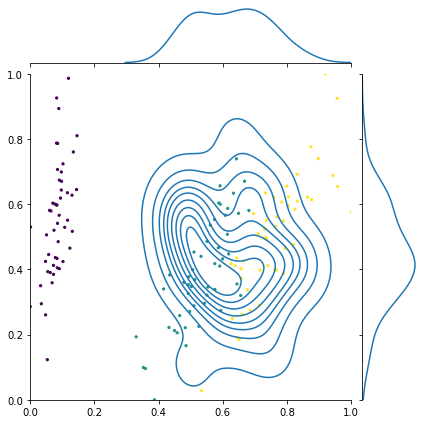

Starting Epoch :  1
Step 1: cost = -0.4967703187071081
Step 11: cost = 0.02414986815418596
Step 21: cost = -0.6818043656310111
Step 31: cost = -0.6029966631596764
Step 41: cost = -0.7149565876868968
Checking output : P(Real == True) : 0.9764342302030854
Checking output : P(Gen == True) : 0.1515240834515677
Generator Training starting......
Step 1: cost = -0.15565851164329053
Step 11: cost = -0.1976216287149043
Step 21: cost = -0.24369380191308504
Checking output : P(Real == True) : 0.9764342302030854
Checking output : P(Gen == True) : 0.26392201260366766
Disc Cost =  -0.7125122175994177


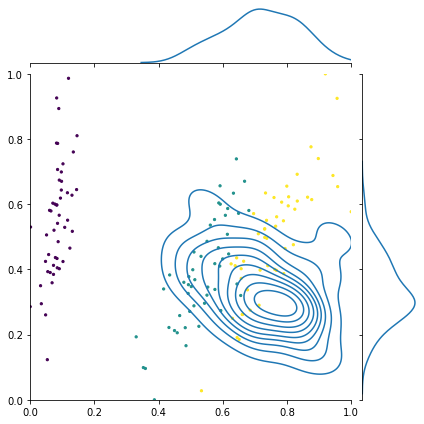

Starting Epoch :  2
Step 1: cost = -0.6980880884207207
Step 11: cost = -0.32838917374920185
Step 21: cost = -0.8034649025689113
Step 31: cost = -0.7835056093521998
Step 41: cost = -0.8261426236681464
Checking output : P(Real == True) : 0.9868567135510693
Checking output : P(Gen == True) : 0.10800373633381682
Generator Training starting......
Step 1: cost = -0.11155833375370633
Step 11: cost = -0.14707621082094718
Step 21: cost = -0.1862969661468462
Checking output : P(Real == True) : 0.9868567135510693
Checking output : P(Gen == True) : 0.20378643989225798
Disc Cost =  -0.7830702736588113


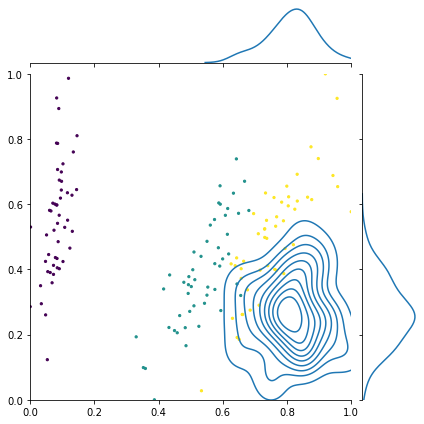

Starting Epoch :  3
Step 1: cost = -0.7085213493813578
Step 11: cost = -0.48009060429789985
Step 21: cost = -0.8079206047712826
Step 31: cost = -0.829746350133259
Step 41: cost = -0.8445785422684934
Checking output : P(Real == True) : 0.9941568175970792
Checking output : P(Gen == True) : 0.10001502641117432
Generator Training starting......
Step 1: cost = -0.10335177406391804
Step 11: cost = -0.13769159902824268
Step 21: cost = -0.1769810616149094
Checking output : P(Real == True) : 0.9941568175970792
Checking output : P(Gen == True) : 0.19474104779863716
Disc Cost =  -0.7994157697984421


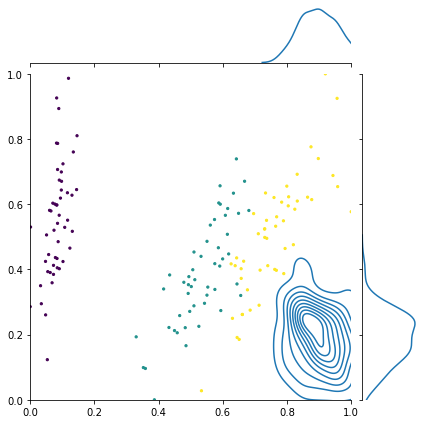

Starting Epoch :  4
Step 1: cost = -0.6963950807147532
Step 11: cost = -0.5414745138150877
Step 21: cost = -0.7808730199392131
Step 31: cost = -0.8272717218627874
Step 41: cost = -0.8248825232864875
Checking output : P(Real == True) : 0.9432299208797666
Checking output : P(Gen == True) : 0.10927953052827094
Generator Training starting......
Step 1: cost = -0.11286908308883292
Step 11: cost = -0.15052748945716488
Step 21: cost = -0.19424280378635228
Checking output : P(Real == True) : 0.9432299208797666
Checking output : P(Gen == True) : 0.21399342626304962
Disc Cost =  -0.729236494616717


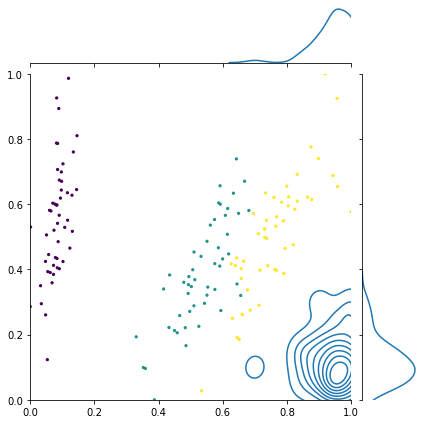

Starting Epoch :  5
Step 1: cost = -0.6660080870111589
Step 11: cost = -0.5526076652595062
Step 21: cost = -0.729781361542574
Step 31: cost = -0.7928398616584924
Step 41: cost = -0.7766788094117177
Checking output : P(Real == True) : 0.9503448400143513
Checking output : P(Gen == True) : 0.13315839265356422
Generator Training starting......
Step 1: cost = -0.13734597517146185
Step 11: cost = -0.18158580878368935
Step 21: cost = -0.23268927396372063
Checking output : P(Real == True) : 0.9503448400143513
Checking output : P(Gen == True) : 0.2554958595972429
Disc Cost =  -0.6948489804171083


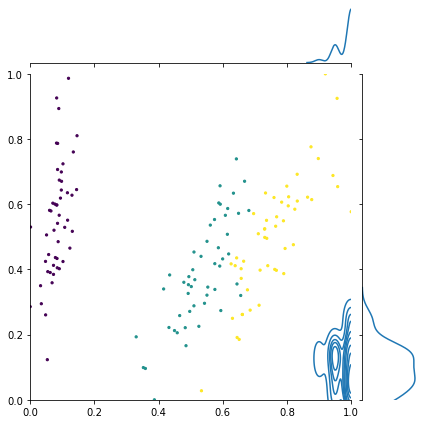

Starting Epoch :  6
Step 1: cost = -0.6139264683250232
Step 11: cost = -0.5266122195484881
Step 21: cost = -0.653667502751796
Step 31: cost = -0.7287079369029892
Step 41: cost = -0.7004347125449903
Checking output : P(Real == True) : 0.8655877908337108
Checking output : P(Gen == True) : 0.17300903405039636
Generator Training starting......
Step 1: cost = -0.17805243438546947
Step 11: cost = -0.23126305058317487
Step 21: cost = -0.29158556352106796
Checking output : P(Real == True) : 0.8655877908337108
Checking output : P(Gen == True) : 0.3179419120232452
Disc Cost =  -0.5476458788104657


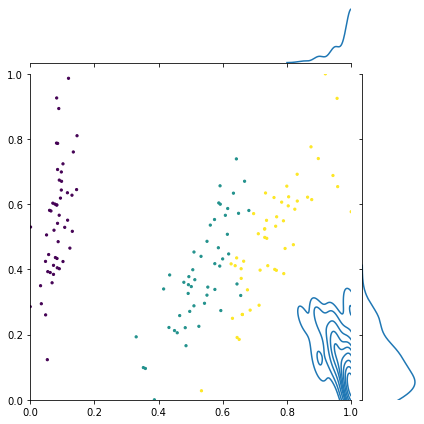

Starting Epoch :  7
Step 1: cost = -0.5373065680455864
Step 11: cost = -0.4674447520779651
Step 21: cost = -0.5505493712015426
Step 31: cost = -0.6335746967668175
Step 41: cost = -0.5947150812758273
Checking output : P(Real == True) : 0.86108367706919
Checking output : P(Gen == True) : 0.23232502690472068
Generator Training starting......
Step 1: cost = -0.2383895828241741
Step 11: cost = -0.3019152931364618
Step 21: cost = -0.37182376291215197
Checking output : P(Real == True) : 0.86108367706919
Checking output : P(Gen == True) : 0.4015006359651337
Disc Cost =  -0.4595830411040563


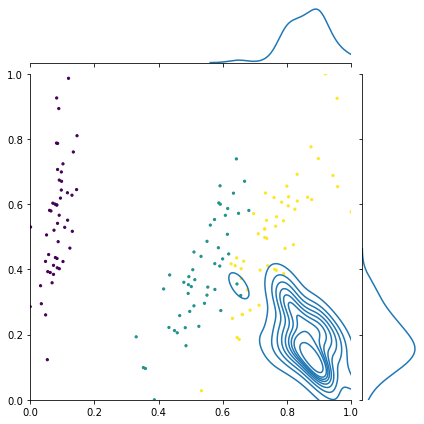

Starting Epoch :  8
Step 1: cost = -0.43469119718848986
Step 11: cost = -0.3766322506886528
Step 21: cost = -0.41997278714699365
Step 31: cost = -0.5068092924671954
Step 41: cost = -0.45947727944836486
Checking output : P(Real == True) : 0.81297398990938
Checking output : P(Gen == True) : 0.3166538193444118
Generator Training starting......
Step 1: cost = -0.3237421126442116
Step 11: cost = -0.3969945785260851
Step 21: cost = -0.4742750502843342
Checking output : P(Real == True) : 0.81297398990938
Checking output : P(Gen == True) : 0.5058587157002536
Disc Cost =  -0.3071152742091263


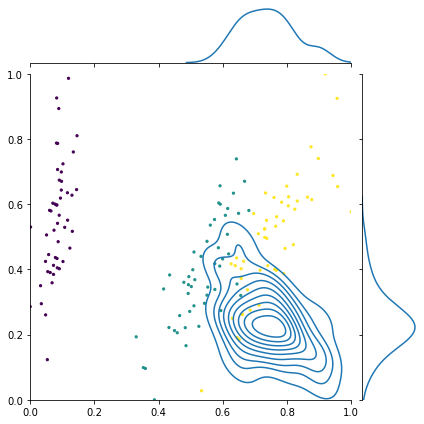

Starting Epoch :  9
Step 1: cost = -0.30818356370672284
Step 11: cost = -0.25833277262672555
Step 21: cost = -0.2664575018243139
Step 31: cost = -0.3529717904345888
Step 41: cost = -0.30018719746821043
Checking output : P(Real == True) : 0.7422558579043799
Checking output : P(Gen == True) : 0.43262464338959683
Generator Training starting......
Step 1: cost = -0.44037571348466026
Step 11: cost = -0.5185614461530548
Step 21: cost = -0.5961981387781252
Checking output : P(Real == True) : 0.7422558579043799
Checking output : P(Gen == True) : 0.6263831514496824
Disc Cost =  -0.1158727064546975


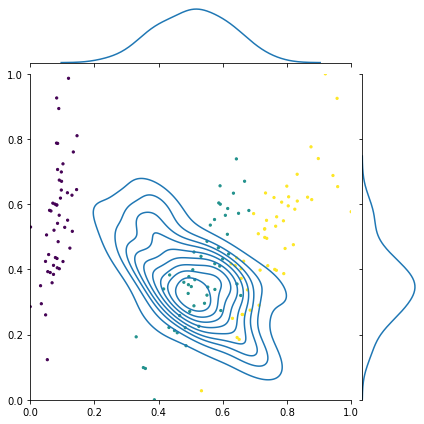

Starting Epoch :  10
Step 1: cost = -0.1689154512050567
Step 11: cost = -0.1269919176079114
Step 21: cost = -0.10630383546129529
Step 31: cost = -0.18971824173546992
Step 41: cost = -0.1359987611243001
Checking output : P(Real == True) : 0.7772832946743475
Checking output : P(Gen == True) : 0.5815470125767255
Generator Training starting......
Step 1: cost = -0.5889095256517465
Step 11: cost = -0.6601637861234452
Step 21: cost = -0.7253565302376048
Checking output : P(Real == True) : 0.7772832946743475
Checking output : P(Gen == True) : 0.7492623269147105
Disc Cost =  -0.028020967759637028


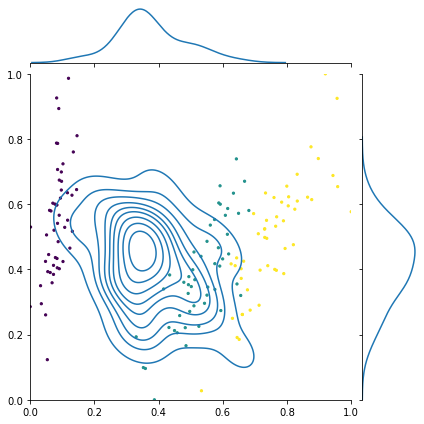

Starting Epoch :  11
Step 1: cost = -0.043110372480502646
Step 11: cost = -0.016415165653225205
Step 21: cost = 0.02394718606952373
Step 31: cost = -0.05743573341884112
Step 41: cost = -0.011710389489887563
Checking output : P(Real == True) : 0.7929813384255333
Checking output : P(Gen == True) : 0.7404262988037189
Generator Training starting......
Step 1: cost = -0.7457398217486106
Step 11: cost = -0.794354895949843
Step 21: cost = -0.8353063930741317
Checking output : P(Real == True) : 0.7929813384255333
Checking output : P(Gen == True) : 0.8496727107962472
Disc Cost =  0.056691372370713866


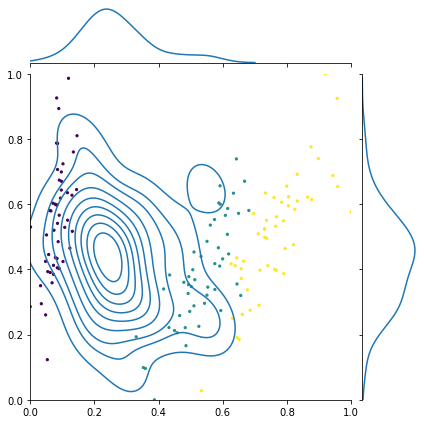

Starting Epoch :  12
Step 1: cost = 0.03106677222731502
Step 11: cost = 0.021048038808610947
Step 21: cost = 0.07084238030123347
Step 31: cost = -0.012047770831199234
Step 41: cost = 0.009699820469294518
Checking output : P(Real == True) : 0.8450219753729814
Checking output : P(Gen == True) : 0.840314122154103
Generator Training starting......
Step 1: cost = -0.8429208643138004
Step 11: cost = -0.8677899218752415
Step 21: cost = -0.8901157991438122
Checking output : P(Real == True) : 0.8450219753729814
Checking output : P(Gen == True) : 0.8982171054821011
Disc Cost =  0.05319513010911969


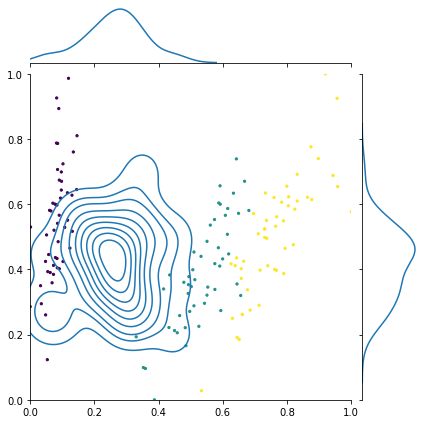

Starting Epoch :  13
Step 1: cost = 0.0317562958778419
Step 11: cost = -0.04066355947370803
Step 21: cost = 0.016916579341033522
Step 31: cost = -0.05533971357471079
Step 41: cost = -0.06440661891690846
Checking output : P(Real == True) : 0.8995847164619188
Checking output : P(Gen == True) : 0.8320094469960724
Generator Training starting......
Step 1: cost = -0.8339791315102636
Step 11: cost = -0.8582153070236783
Step 21: cost = -0.8841373058609863
Checking output : P(Real == True) : 0.8995847164619188
Checking output : P(Gen == True) : 0.8938118847894321
Disc Cost =  -0.005772831672486767


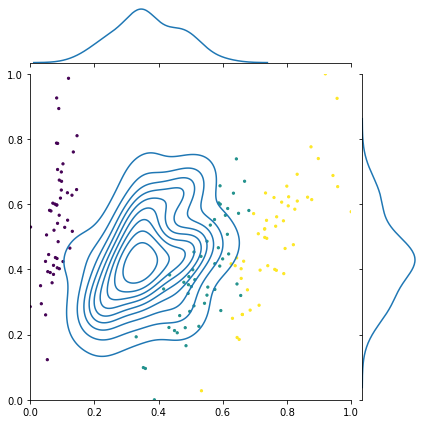

Starting Epoch :  14
Step 1: cost = 0.0031346570874339896
Step 11: cost = -0.11877186229588466
Step 21: cost = -0.046192443808200645
Step 31: cost = -0.08075473021075918
Step 41: cost = -0.10696642332095596
Checking output : P(Real == True) : 0.8709781671694652
Checking output : P(Gen == True) : 0.801221693676257
Generator Training starting......
Step 1: cost = -0.8045042851899092
Step 11: cost = -0.8412498577279679
Step 21: cost = -0.8772142599464468
Checking output : P(Real == True) : 0.8709781671694652
Checking output : P(Gen == True) : 0.8900836822280779
Disc Cost =  0.019105515058612688


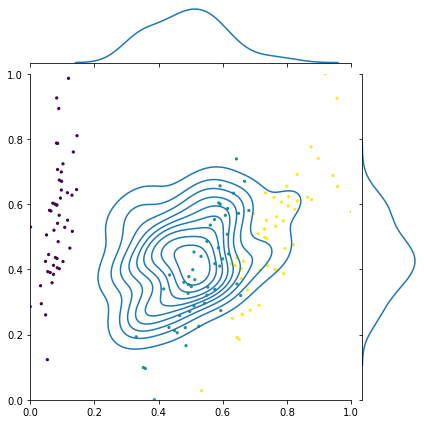

Starting Epoch :  15
Step 1: cost = 0.01833400573001498
Step 11: cost = -0.11315119929827455
Step 21: cost = -0.03144858338541334
Step 31: cost = -0.028994285464795655
Step 41: cost = -0.061739373098949946
Checking output : P(Real == True) : 0.8376384045550295
Checking output : P(Gen == True) : 0.8363175972653369
Generator Training starting......
Step 1: cost = -0.840191932827306
Step 11: cost = -0.8784265078520653
Step 21: cost = -0.9113464524470849
Checking output : P(Real == True) : 0.8376384045550295
Checking output : P(Gen == True) : 0.9224500866227472
Disc Cost =  0.08481168206771772


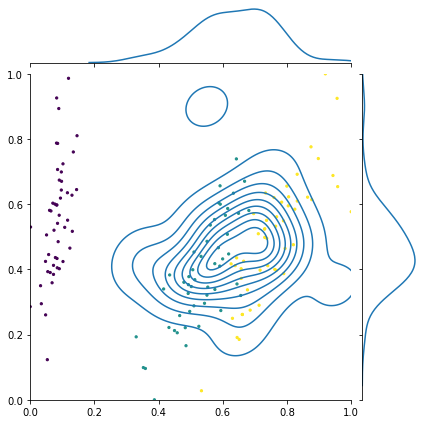

Starting Epoch :  16
Step 1: cost = 0.07357756831394235
Step 11: cost = -0.049683215691038285
Step 21: cost = 0.027723334618550255
Step 31: cost = 0.04583152016174352
Step 41: cost = 0.011080872207888004
Checking output : P(Real == True) : 0.8621642560824585
Checking output : P(Gen == True) : 0.9217564515438232
Generator Training starting......
Step 1: cost = -0.9244269123345472
Step 11: cost = -0.9475264645770266
Step 21: cost = -0.9643710445720115
Checking output : P(Real == True) : 0.8621642560824585
Checking output : P(Gen == True) : 0.9695988224696002
Disc Cost =  0.10743456638714166


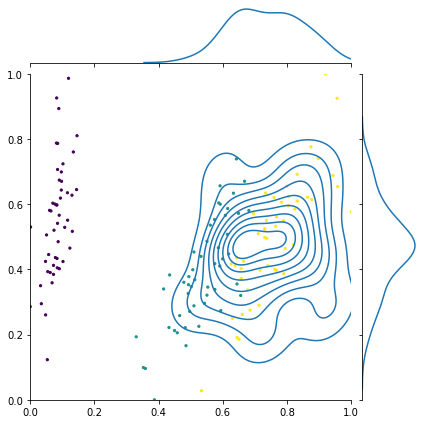

Starting Epoch :  17
Step 1: cost = 0.11153569652248174
Step 11: cost = 0.0020539370571519555
Step 21: cost = 0.05975511288193247
Step 31: cost = 0.07309279005755809
Step 41: cost = 0.03960203421510089
Checking output : P(Real == True) : 0.9043822422458199
Checking output : P(Gen == True) : 0.9901185792611261
Generator Training starting......
Step 1: cost = -0.9907806335952651
Step 11: cost = -0.9951442849038734
Step 21: cost = -0.9972565689816276
Checking output : P(Real == True) : 0.9043822422458199
Checking output : P(Gen == True) : 0.9977874900176893
Disc Cost =  0.09340524777186943


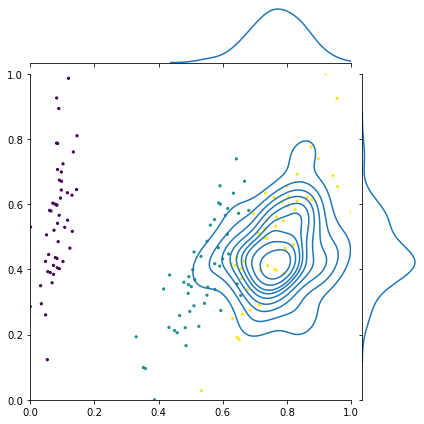

Starting Epoch :  18
Step 1: cost = 0.09130239427841436
Step 11: cost = 0.010485453629537678
Step 21: cost = 0.03349911425508201
Step 31: cost = 0.03233217752959194
Step 41: cost = 0.0077647533067031205
Checking output : P(Real == True) : 0.9740496888409543
Checking output : P(Gen == True) : 0.99173016481533
Generator Training starting......
Step 1: cost = -0.9915828610500677
Step 11: cost = -0.991711080681788
Step 21: cost = -0.993209554682859
Checking output : P(Real == True) : 0.9740496888409543
Checking output : P(Gen == True) : 0.9938780289012251
Disc Cost =  0.019828340060270788


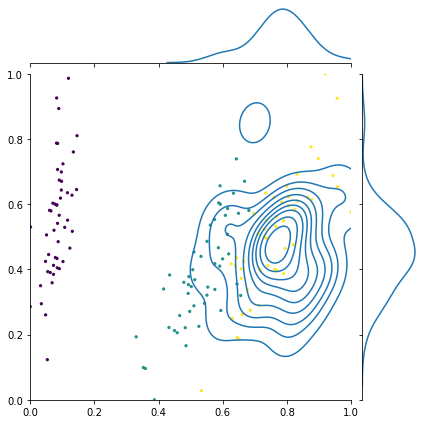

Starting Epoch :  19
Step 1: cost = 0.028852671854759482
Step 11: cost = 0.0002154739000184147
Step 21: cost = -0.012637716850274261
Step 31: cost = -0.02333239779602614
Step 41: cost = -0.029442138422255515
Checking output : P(Real == True) : 0.9951561951369092
Checking output : P(Gen == True) : 0.9551202277249332
Generator Training starting......
Step 1: cost = -0.9556432974961473
Step 11: cost = -0.9633738293675694
Step 21: cost = -0.9719824277817548
Checking output : P(Real == True) : 0.9951561951369092
Checking output : P(Gen == True) : 0.9750908675260703
Disc Cost =  -0.0200653276108389


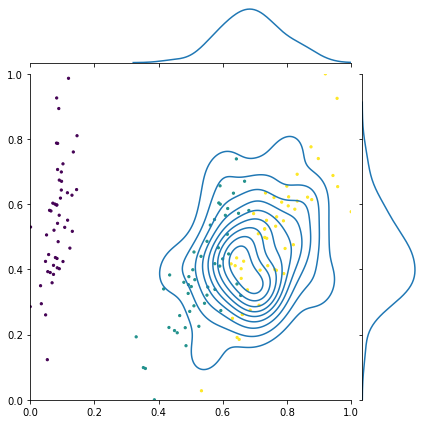

Starting Epoch :  20
Step 1: cost = -0.02143373105778046
Step 11: cost = 0.0077361259095002355
Step 21: cost = -0.028738296734994062
Step 31: cost = -0.041930471651796974
Step 41: cost = -0.030964490270279588
Checking output : P(Real == True) : 0.976525020945116
Checking output : P(Gen == True) : 0.9347780636317367
Generator Training starting......
Step 1: cost = -0.9360016544089469
Step 11: cost = -0.9491383890739478
Step 21: cost = -0.9612934135421872
Checking output : P(Real == True) : 0.976525020945116
Checking output : P(Gen == True) : 0.9655178607087265
Disc Cost =  -0.01100716023638948


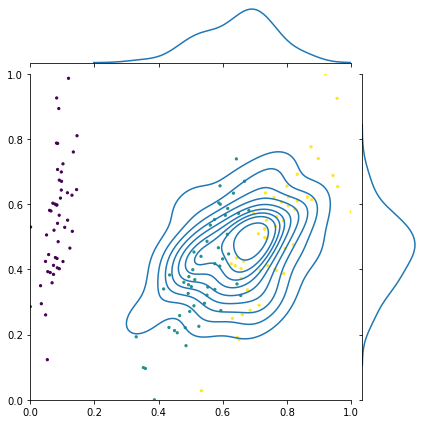

Starting Epoch :  21
Step 1: cost = -0.03431734220391913
Step 11: cost = 0.03247654702291969
Step 21: cost = -0.01498661010254343
Step 31: cost = -0.029099913501988706
Step 41: cost = -0.009790557721968907
Checking output : P(Real == True) : 0.9585699780513959
Checking output : P(Gen == True) : 0.9427189147913555
Generator Training starting......
Step 1: cost = -0.9439918557093602
Step 11: cost = -0.9563022665668306
Step 21: cost = -0.9668140994115599
Checking output : P(Real == True) : 0.9585699780513959
Checking output : P(Gen == True) : 0.970404933727399
Disc Cost =  0.011834955676003123


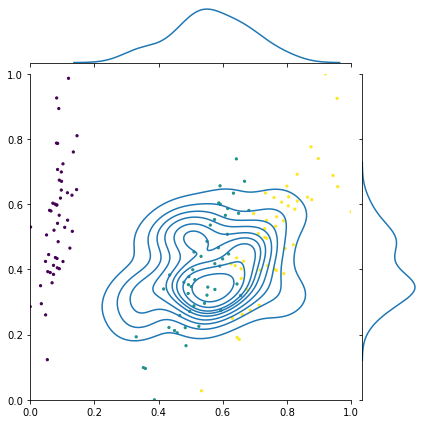

Starting Epoch :  22
Step 1: cost = -0.022586949104590137
Step 11: cost = 0.05512258673597792
Step 21: cost = 0.004822986966963816
Step 31: cost = -0.010561147172616137
Step 41: cost = 0.008904386194997116
Checking output : P(Real == True) : 0.9563919341128055
Checking output : P(Gen == True) : 0.9631075906345085
Generator Training starting......
Step 1: cost = -0.9640089424960878
Step 11: cost = -0.9722839257941189
Step 21: cost = -0.9790383849556245
Checking output : P(Real == True) : 0.9563919341128055
Checking output : P(Gen == True) : 0.9813189625098837
Disc Cost =  0.024927028397078166


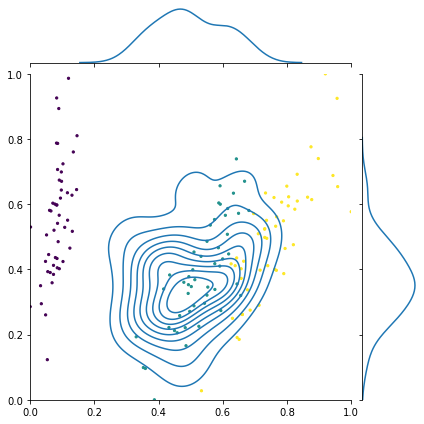

Starting Epoch :  23
Step 1: cost = -0.005068512226269473
Step 11: cost = 0.062202884634089406
Step 21: cost = 0.014719954288164527
Step 31: cost = -0.0012030792457878858
Step 41: cost = 0.01303086426084965
Checking output : P(Real == True) : 0.9871671556200334
Checking output : P(Gen == True) : 0.9788559455095494
Generator Training starting......
Step 1: cost = -0.9793667655855001
Step 11: cost = -0.9841347031510608
Step 21: cost = -0.9880892223370301
Checking output : P(Real == True) : 0.9871671556200334
Checking output : P(Gen == True) : 0.9894254512319502
Disc Cost =  0.0022582956119168163


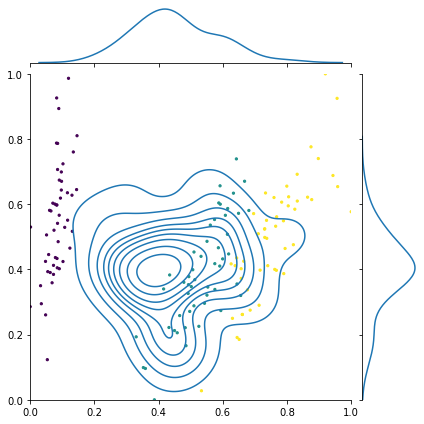

Starting Epoch :  24
Step 1: cost = 0.008356980519430568
Step 11: cost = 0.053162619008751966
Step 21: cost = 0.013159159541052734
Step 31: cost = -0.0006091951092622727
Step 41: cost = 0.006426183557513898
Checking output : P(Real == True) : 0.9784562715679022
Checking output : P(Gen == True) : 0.9845539864052641
Generator Training starting......
Step 1: cost = -0.9848933467046148
Step 11: cost = -0.9883979018687095
Step 21: cost = -0.9915126997231879
Checking output : P(Real == True) : 0.9784562715679022
Checking output : P(Gen == True) : 0.9925672753614176
Disc Cost =  0.014111003793515486


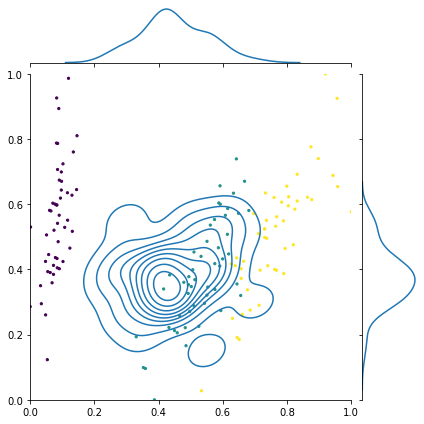

Starting Epoch :  25
Step 1: cost = 0.01688083506655169
Step 11: cost = 0.038427010247973126
Step 21: cost = 0.00798150649876217
Step 31: cost = -0.0006397330242287058
Step 41: cost = 0.00011094763570551613
Checking output : P(Real == True) : 0.9834152516323836
Checking output : P(Gen == True) : 0.9865403382364897
Generator Training starting......
Step 1: cost = -0.9868646353343755
Step 11: cost = -0.9902124874339282
Step 21: cost = -0.9931161755720279
Checking output : P(Real == True) : 0.9834152516323836
Checking output : P(Gen == True) : 0.9940746408444643
Disc Cost =  0.01065938921208065


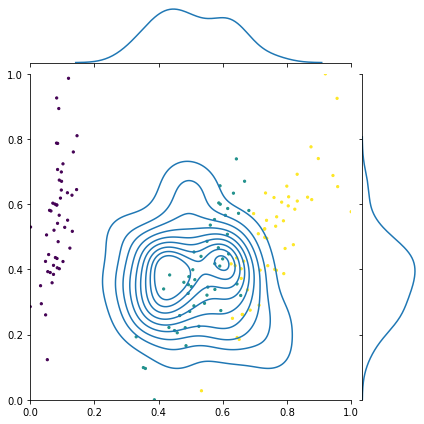

Starting Epoch :  26
Step 1: cost = 0.02220826717023927
Step 11: cost = 0.02819613040890112
Step 21: cost = 0.005259225063432904
Step 31: cost = 0.0023909843846532386
Step 41: cost = -0.0008423659463071553
Checking output : P(Real == True) : 0.9873397537634987
Checking output : P(Gen == True) : 0.9910326639534899
Generator Training starting......
Step 1: cost = -0.9913019108734139
Step 11: cost = -0.9938346938614167
Step 21: cost = -0.9958295937155772
Checking output : P(Real == True) : 0.9873397537634987
Checking output : P(Gen == True) : 0.9964611566681247
Disc Cost =  0.009121402904626041


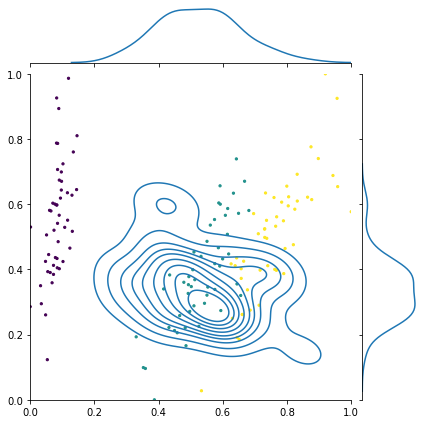

Starting Epoch :  27
Step 1: cost = 0.02338854820587133
Step 11: cost = 0.023844484972127544
Step 21: cost = 0.00404285194556353
Step 31: cost = 0.004657008718578437
Step 41: cost = 0.0001738466173705211
Checking output : P(Real == True) : 0.9798037515272261
Checking output : P(Gen == True) : 0.996371801687578
Generator Training starting......
Step 1: cost = -0.9965019430305901
Step 11: cost = -0.9976044124865162
Step 21: cost = -0.9983873429602619
Checking output : P(Real == True) : 0.9798037515272261
Checking output : P(Gen == True) : 0.9986272759562312
Disc Cost =  0.018823524429005145


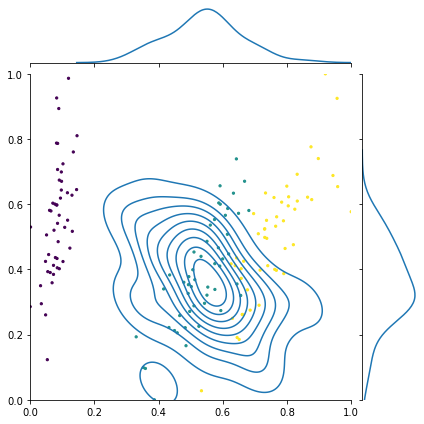

Starting Epoch :  28
Step 1: cost = 0.018630011790675804
Step 11: cost = 0.02151657273141394
Step 21: cost = 0.0014931357447458549
Step 31: cost = 0.0023051337221577928
Step 41: cost = -0.0006335142966580332
Checking output : P(Real == True) : 0.999505560750965
Checking output : P(Gen == True) : 0.9977459149710879
Generator Training starting......
Step 1: cost = -0.997779627588876
Step 11: cost = -0.9981755213136079
Step 21: cost = -0.9985827480830372
Checking output : P(Real == True) : 0.999505560750965
Checking output : P(Gen == True) : 0.9987304569263165
Disc Cost =  -0.0007751038246485153


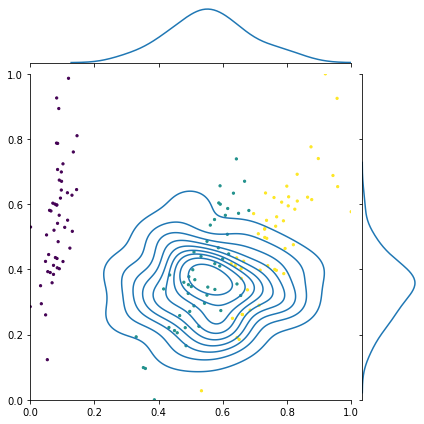

Starting Epoch :  29
Step 1: cost = 0.009632179711634326
Step 11: cost = 0.019485353680091078
Step 21: cost = -0.0014192750856453218
Step 31: cost = -0.00263642457134472
Step 41: cost = -0.0018910579991218146
Checking output : P(Real == True) : 0.9980762146179729
Checking output : P(Gen == True) : 0.9950033657346399
Generator Training starting......
Step 1: cost = -0.9950674210518466
Step 11: cost = -0.995960224436239
Step 21: cost = -0.9969308386705653
Checking output : P(Real == True) : 0.9980762146179729
Checking output : P(Gen == True) : 0.9972796858337382
Disc Cost =  -0.0007965287842347513


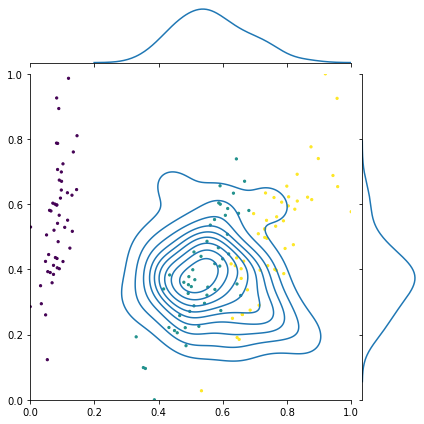

Starting Epoch :  30
Step 1: cost = 0.001431179075185307
Step 11: cost = 0.01923228018520251
Step 21: cost = -0.0014246996164299919
Step 31: cost = -0.005172796053654838
Step 41: cost = -0.0003164094311376431
Checking output : P(Real == True) : 0.997480069332207
Checking output : P(Gen == True) : 0.9926809192257888
Generator Training starting......
Step 1: cost = -0.9928260858148905
Step 11: cost = -0.9944305110868138
Step 21: cost = -0.995912862252111
Checking output : P(Real == True) : 0.997480069332207
Checking output : P(Gen == True) : 0.9964174146251286
Disc Cost =  -0.0010626547070784476


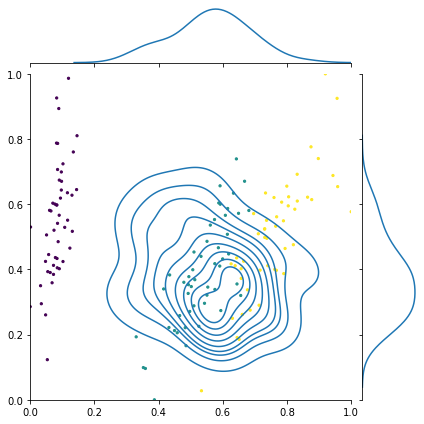

Starting Epoch :  31
Step 1: cost = -0.00227113639497567
Step 11: cost = 0.02131613991790715
Step 21: cost = 0.0019312050505990719
Step 31: cost = -0.0036651686514417303
Step 41: cost = 0.0037837403972265093
Checking output : P(Real == True) : 0.9965013782246707
Checking output : P(Gen == True) : 0.9937980007832359
Generator Training starting......
Step 1: cost = -0.9939586835711269
Step 11: cost = -0.9954993751497634
Step 21: cost = -0.9967583302676175
Checking output : P(Real == True) : 0.9965013782246707
Checking output : P(Gen == True) : 0.9971699519498066
Disc Cost =  0.0006685737251359569


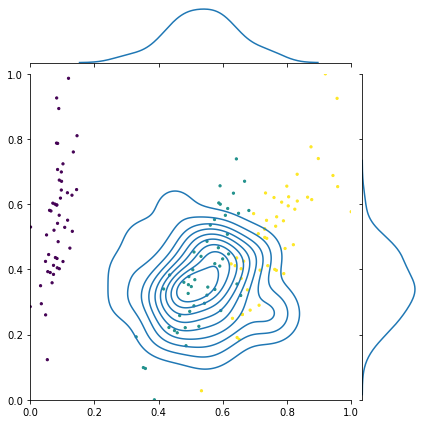

Starting Epoch :  32
Step 1: cost = -0.001928220937830627
Step 11: cost = 0.023467352045009382
Step 21: cost = 0.005462094833204811
Step 31: cost = -0.0007479151374550908
Step 41: cost = 0.006833213114536774
Checking output : P(Real == True) : 0.9961988316110707
Checking output : P(Gen == True) : 0.9969112971556482
Generator Training starting......
Step 1: cost = -0.9970088047193596
Step 11: cost = -0.9978393023404655
Step 21: cost = -0.9984442639255748
Checking output : P(Real == True) : 0.9961988316110707
Checking output : P(Gen == True) : 0.998635692923109
Disc Cost =  0.002436861312038352


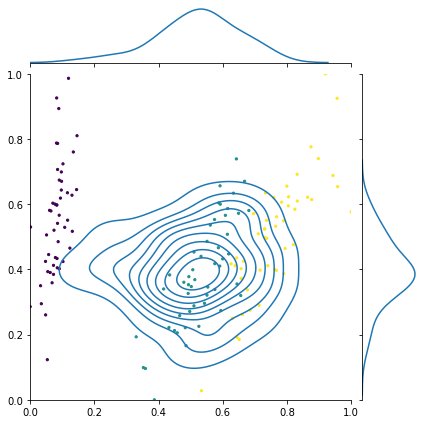

Starting Epoch :  33
Step 1: cost = -0.00014202072834990087
Step 11: cost = 0.023125563518527126
Step 21: cost = 0.006143644231852097
Step 31: cost = 0.0007314109584267703
Step 41: cost = 0.006402326413202819
Checking output : P(Real == True) : 0.9971382971060038
Checking output : P(Gen == True) : 0.999017777041759
Generator Training starting......
Step 1: cost = -0.9990475340589453
Step 11: cost = -0.9992911876237458
Step 21: cost = -0.9994690459495335
Checking output : P(Real == True) : 0.9971382971060038
Checking output : P(Gen == True) : 0.9995269819095418
Disc Cost =  0.0023886848035380437


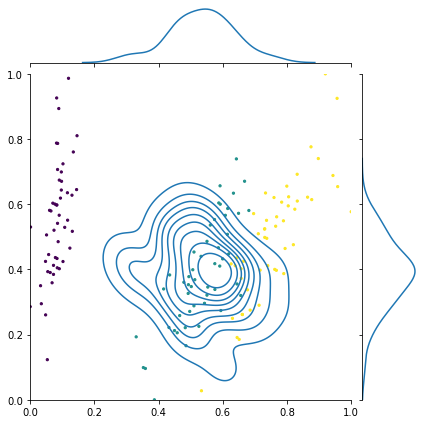

Starting Epoch :  34
Step 1: cost = 0.0014966610891224974
Step 11: cost = 0.020222974520028747
Step 21: cost = 0.004047074718481425
Step 31: cost = 0.000574466096510351
Step 41: cost = 0.003529729748093513
Checking output : P(Real == True) : 0.9975565822219956
Checking output : P(Gen == True) : 0.9991906455951203
Generator Training starting......
Step 1: cost = -0.9992019579302677
Step 11: cost = -0.9993610976786096
Step 21: cost = -0.999533553611378
Checking output : P(Real == True) : 0.9975565822219956
Checking output : P(Gen == True) : 0.9995944566797963
Disc Cost =  0.0020378744578006813


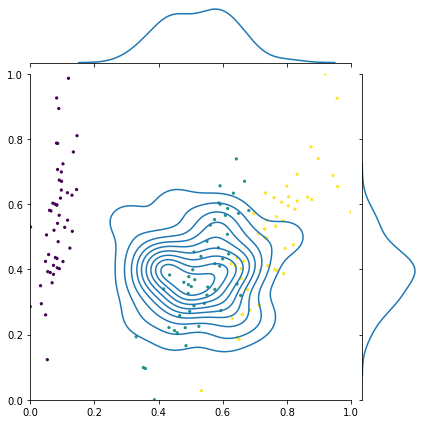

Starting Epoch :  35
Step 1: cost = 0.003048303837091537
Step 11: cost = 0.01690397583020653
Step 21: cost = 0.0014486092000532969
Step 31: cost = 0.0002328079988737075
Step 41: cost = 0.0008971306651476274
Checking output : P(Real == True) : 0.9990450629228118
Checking output : P(Gen == True) : 0.9987317541065742
Generator Training starting......
Step 1: cost = -0.998757545323958
Step 11: cost = -0.9990625306577373
Step 21: cost = -0.9993503644755319
Checking output : P(Real == True) : 0.9990450629228118
Checking output : P(Gen == True) : 0.9994465102066177
Disc Cost =  0.0004014472838058669


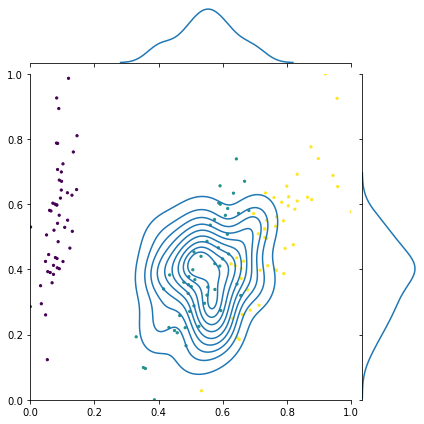

Starting Epoch :  36
Step 1: cost = 0.0047674332593525826
Step 11: cost = 0.015174092420288998
Step 21: cost = 0.00010119008897913062
Step 31: cost = 0.00044258831033949786
Step 41: cost = -4.3758443670438574e-05
Checking output : P(Real == True) : 0.9951023120898554
Checking output : P(Gen == True) : 0.9988527032606845
Generator Training starting......
Step 1: cost = -0.9988845854493629
Step 11: cost = -0.9991979604063369
Step 21: cost = -0.9994536665289924
Checking output : P(Real == True) : 0.9951023120898554
Checking output : P(Gen == True) : 0.9995353786244939
Disc Cost =  0.004433066534638486


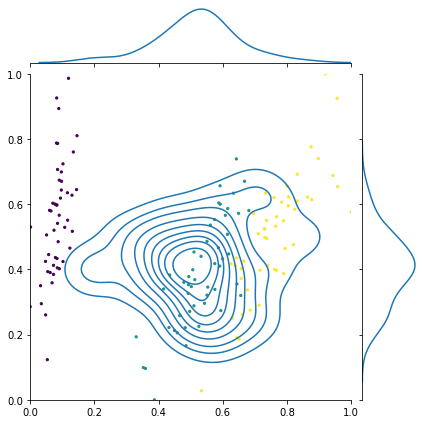

Starting Epoch :  37
Step 1: cost = 0.006124435744526813
Step 11: cost = 0.015472366823838235
Step 21: cost = 6.84070727072772e-05
Step 31: cost = 0.0006849196816405279
Step 41: cost = 0.00035418590268576633
Checking output : P(Real == True) : 0.9970762074957757
Checking output : P(Gen == True) : 0.9993938578341164
Generator Training starting......
Step 1: cost = -0.9994131172266639
Step 11: cost = -0.9995812735426532
Step 21: cost = -0.9997058406003035
Checking output : P(Real == True) : 0.9970762074957757
Checking output : P(Gen == True) : 0.9997450487160797
Disc Cost =  0.0026688412203039746


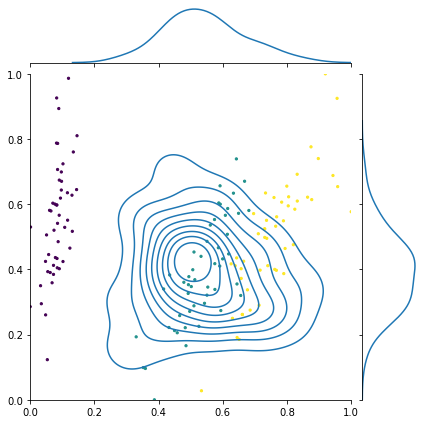

Starting Epoch :  38
Step 1: cost = 0.006376951800439623
Step 11: cost = 0.01717540142388474
Step 21: cost = 0.0006603110983895988
Step 31: cost = 0.0003907527543608458
Step 41: cost = 0.0012795328214694202
Checking output : P(Real == True) : 0.9980309706683068
Checking output : P(Gen == True) : 0.9996350979668153
Generator Training starting......
Step 1: cost = -0.9996420757251079
Step 11: cost = -0.9997135304311746
Step 21: cost = -0.9997793492382705
Checking output : P(Real == True) : 0.9980309706683068
Checking output : P(Gen == True) : 0.9998025094577725
Disc Cost =  0.0017715387894656764


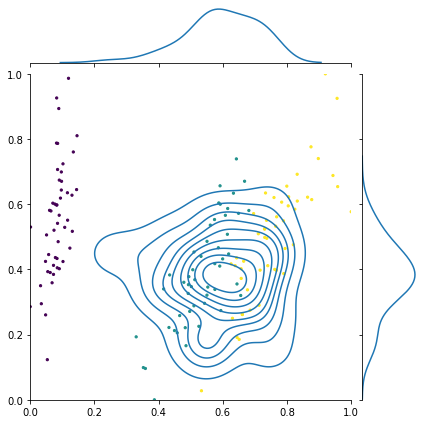

Starting Epoch :  39
Step 1: cost = 0.005501653500826653
Step 11: cost = 0.019587046628726235
Step 21: cost = 0.0015170507794401988
Step 31: cost = -0.00021867187842172786
Step 41: cost = 0.002421879357508039
Checking output : P(Real == True) : 0.9954152981774266
Checking output : P(Gen == True) : 0.9994406804909473
Generator Training starting......
Step 1: cost = -0.9994489545847746
Step 11: cost = -0.9995557781389428
Step 21: cost = -0.9996667293375971
Checking output : P(Real == True) : 0.9954152981774266
Checking output : P(Gen == True) : 0.9997059960030195
Disc Cost =  0.004290697825592882


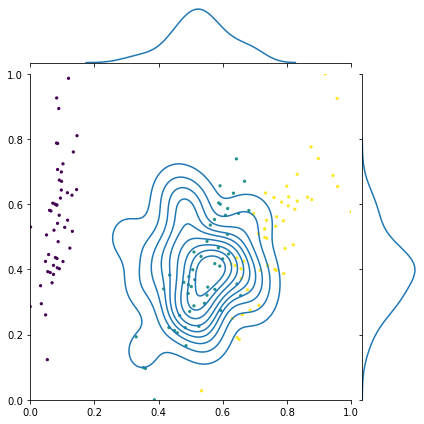

Starting Epoch :  40
Step 1: cost = 0.004223973442819551
Step 11: cost = 0.022171051372897654
Step 21: cost = 0.002604209362530141
Step 31: cost = -0.000554719063864173
Step 41: cost = 0.0037097747420286042
Checking output : P(Real == True) : 0.99454637162783
Checking output : P(Gen == True) : 0.999267941097387
Generator Training starting......
Step 1: cost = -0.9992835161013518
Step 11: cost = -0.9994533010188605
Step 21: cost = -0.9996071136083351
Checking output : P(Real == True) : 0.99454637162783
Checking output : P(Gen == True) : 0.9996587272699491
Disc Cost =  0.005112355642119093


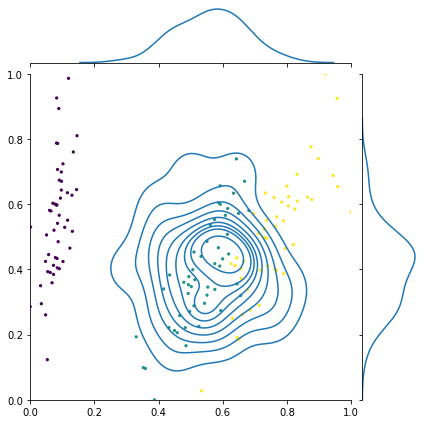

Starting Epoch :  41
Step 1: cost = 0.0033031232235115615
Step 11: cost = 0.024300645975009916
Step 21: cost = 0.0036978221380468135
Step 31: cost = -0.00042750393013024635
Step 41: cost = 0.00479173632612806
Checking output : P(Real == True) : 0.9970474894579067
Checking output : P(Gen == True) : 0.9994371806328164
Generator Training starting......
Step 1: cost = -0.9994531930757318
Step 11: cost = -0.9996041972012553
Step 21: cost = -0.9997240974086992
Checking output : P(Real == True) : 0.9970474894579067
Checking output : P(Gen == True) : 0.9997624694378464
Disc Cost =  0.0027149799799397467


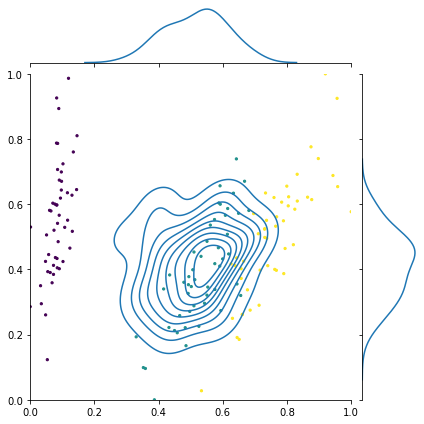

Starting Epoch :  42
Step 1: cost = 0.0030051075008318273
Step 11: cost = 0.025298424964602773
Step 21: cost = 0.004322222067473791
Step 31: cost = -0.00013695555300108353
Step 41: cost = 0.00515464193438353
Checking output : P(Real == True) : 0.9997805955640503
Checking output : P(Gen == True) : 0.9997835878267956
Generator Training starting......
Step 1: cost = -0.9997919518508506
Step 11: cost = -0.9998595975441668
Step 21: cost = -0.999904966155235
Checking output : P(Real == True) : 0.9997805955640503
Checking output : P(Gen == True) : 0.9999186099896031
Disc Cost =  0.00013801442555283483


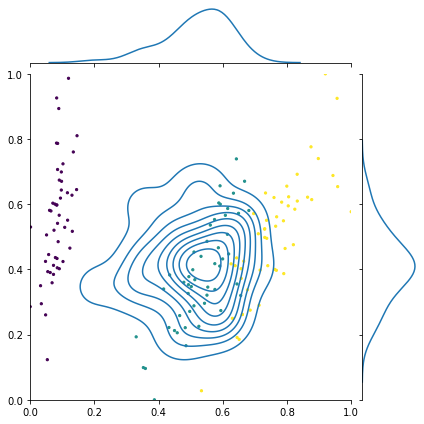

Starting Epoch :  43
Step 1: cost = 0.0031829260214373267
Step 11: cost = 0.024851777589228075
Step 21: cost = 0.004178358749220679
Step 31: cost = 3.6728133891994474e-06
Step 41: cost = 0.0046362860664717065
Checking output : P(Real == True) : 0.9997903038696563
Checking output : P(Gen == True) : 0.9999786827888675
Generator Training starting......
Step 1: cost = -0.9999798071898698
Step 11: cost = -0.9999869551025454
Step 21: cost = -0.9999907517592279
Checking output : P(Real == True) : 0.9997903038696563
Checking output : P(Gen == True) : 0.9999918666650462
Disc Cost =  0.00020156279538996458


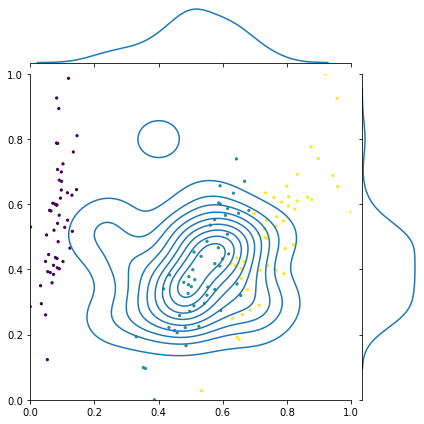

Starting Epoch :  44
Step 1: cost = 0.003609405071397398
Step 11: cost = 0.023285123811269237
Step 21: cost = 0.003441375032244398
Step 31: cost = -7.403588923482474e-06
Step 41: cost = 0.003614914904266353
Checking output : P(Real == True) : 0.9994365153137295
Checking output : P(Gen == True) : 0.999941748121568
Generator Training starting......
Step 1: cost = -0.9999418257465729
Step 11: cost = -0.99995032406863
Step 21: cost = -0.9999635114720071
Checking output : P(Real == True) : 0.9994365153137295
Checking output : P(Gen == True) : 0.9999684601381698
Disc Cost =  0.0005319448244403002


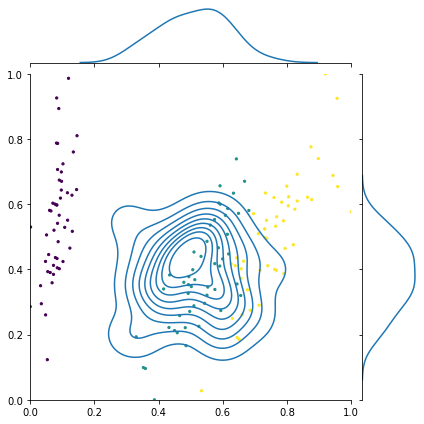

Starting Epoch :  45
Step 1: cost = 0.004123305195261273
Step 11: cost = 0.021350209582462254
Step 21: cost = 0.0025863855408801983
Step 31: cost = 4.7416335913208485e-06
Step 41: cost = 0.002676684210089597
Checking output : P(Real == True) : 0.9975842714327527
Checking output : P(Gen == True) : 0.9998467812017596
Generator Training starting......
Step 1: cost = -0.9998495906792106
Step 11: cost = -0.9998847867878272
Step 21: cost = -0.9999192559810651
Checking output : P(Real == True) : 0.9975842714327527
Checking output : P(Gen == True) : 0.9999309087396091
Disc Cost =  0.0023466373068563584


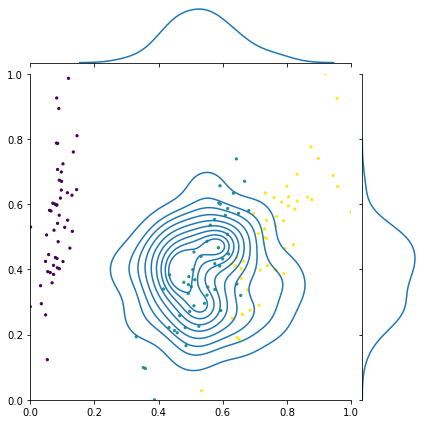

Starting Epoch :  46
Step 1: cost = 0.004568711651688817
Step 11: cost = 0.019747798961668783
Step 21: cost = 0.002000493111450452
Step 31: cost = 0.00010812193500220335
Step 41: cost = 0.002182217220819904
Checking output : P(Real == True) : 0.9991032025695992
Checking output : P(Gen == True) : 0.9998468150230027
Generator Training starting......
Step 1: cost = -0.9998509332104901
Step 11: cost = -0.999891789755393
Step 21: cost = -0.9999254953471228
Checking output : P(Real == True) : 0.9991032025695992
Checking output : P(Gen == True) : 0.9999363389297049
Disc Cost =  0.0008331363601057351


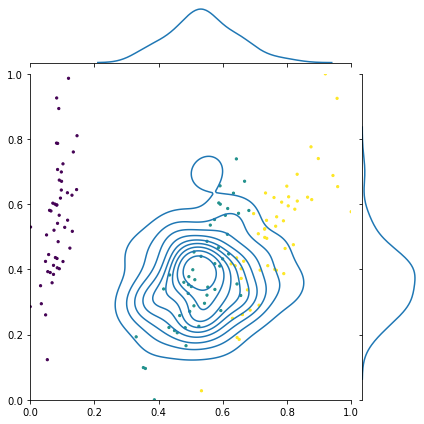

Starting Epoch :  47
Step 1: cost = 0.0047648987199429005
Step 11: cost = 0.018816240027715425
Step 21: cost = 0.0017936721167433056
Step 31: cost = 0.00020772515890532528
Step 41: cost = 0.0021490919569220335
Checking output : P(Real == True) : 0.9999602916449449
Checking output : P(Gen == True) : 0.9999192848755982
Generator Training starting......
Step 1: cost = -0.9999219355764783
Step 11: cost = -0.9999448539056395
Step 21: cost = -0.9999615838927451
Checking output : P(Real == True) : 0.9999602916449449
Checking output : P(Gen == True) : 0.9999668082279551
Disc Cost =  6.516583010207633e-06


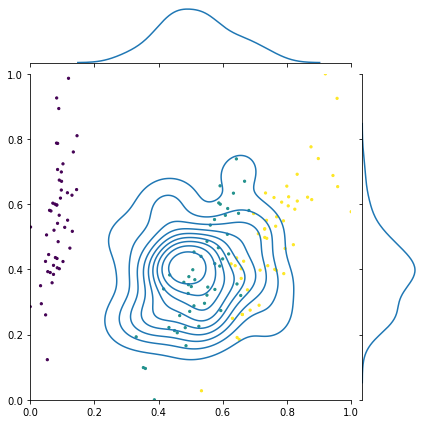

Starting Epoch :  48
Step 1: cost = 0.004605692010962614
Step 11: cost = 0.018547595508705883
Step 21: cost = 0.0018883292175763122
Step 31: cost = 0.0002066382797362154
Step 41: cost = 0.002420111876296538
Checking output : P(Real == True) : 0.9998103642992936
Checking output : P(Gen == True) : 0.9999639071712592
Generator Training starting......
Step 1: cost = -0.9999647692620359
Step 11: cost = -0.9999726942655189
Step 21: cost = -0.9999792942545516
Checking output : P(Real == True) : 0.9998103642992936
Checking output : P(Gen == True) : 0.999981542268059
Disc Cost =  0.00017117796876542357


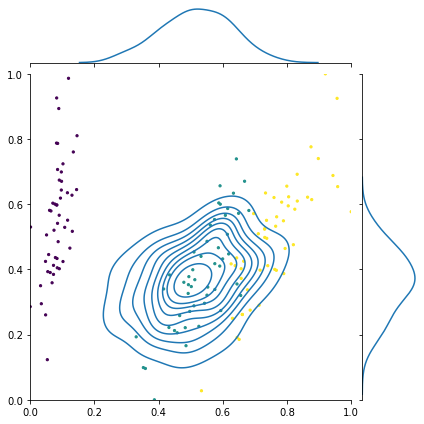

Starting Epoch :  49
Step 1: cost = 0.004158498654263321
Step 11: cost = 0.018755020248430898
Step 21: cost = 0.0021688511046575876
Step 31: cost = 0.00012516977683985075
Step 41: cost = 0.0028319449259784912
Checking output : P(Real == True) : 0.9996792507309986
Checking output : P(Gen == True) : 0.9999510155362192
Generator Training starting......
Step 1: cost = -0.9999517060076661
Step 11: cost = -0.9999610179496151
Step 21: cost = -0.9999709205387106
Checking output : P(Real == True) : 0.9996792507309986
Checking output : P(Gen == True) : 0.9999744339796908
Disc Cost =  0.0002951832486921546


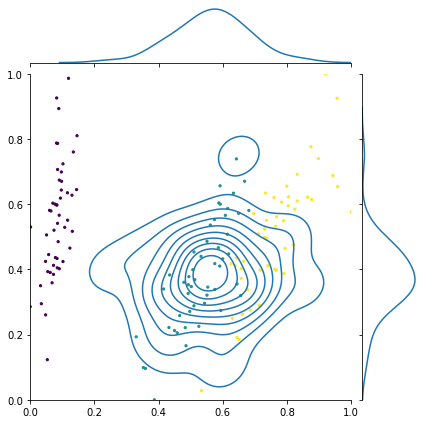

In [17]:
# trainin cycle loop:
# dev.shots = 10
# learning_rate = 0.1
epochs = 50
for ep in range(epochs):
    print("Starting Epoch : ", ep)
    
    # Train the discriminator first, lock the generator variables:
    disc_weights.requires_grad = True
    gen_weights.requires_grad = False
    for i in range(len(pca_data)):
        x_in_l = np.array(pca_data[i], requires_grad=False)
        x_in_l, gen_weights, disc_weights = opt.step(disc_cost, np.array(pca_data[i], requires_grad=False), gen_weights, disc_weights)
#         gradient = qml.gradients.param_shift(real_disc_circuit)(x_in_l, disc_weights)
#         disc_weights = update_weights(disc_weights, learning_rate, gradient, True)
        cost = disc_cost(x_in_l, gen_weights, disc_weights)
        if i % 10 == 0:
            print("Step {}: cost = {}".format(i + 1, cost))
            
    test_x = pca_data[random.randrange(len(pca_data))]
    print("Checking output : P(Real == True) :", prob_real_true(test_x, disc_weights))
    print("Checking output : P(Gen == True) :", prob_fake_true(gen_weights, disc_weights))
    
    print("Generator Training starting......")
    # Train the Generator next, lock the discriminator variables:
    disc_weights.requires_grad = False
    gen_weights.requires_grad = True   
    for j in range(25):
        gen_weights, disc_weights = opt.step(gen_cost, gen_weights, disc_weights)
#         gradient = qml.gradients.param_shift(gen_disc_circuit)(gen_weights, disc_weights)
#         gen_weights = update_weights(gen_weights, learning_rate, gradient, True)
        cost = gen_cost(gen_weights, disc_weights)
        if j % 10 == 0:
            print("Step {}: cost = {}".format(j + 1, cost))
            
    print("Checking output : P(Real == True) :", prob_real_true(test_x, disc_weights))
    print("Checking output : P(Gen == True) :", prob_fake_true(gen_weights, disc_weights))
    print("Disc Cost = ", disc_cost(test_x,gen_weights,disc_weights))
    # generate distribution graph
    gen_datas = []
    for _ in range(50):
        res = gen_data(gen_weights)
        result = []
        for i in range(len(res)): 
            result.append(res[i].tolist().count(-1) / len(res[i].tolist()))
        gen_datas.append(result)
    
    generated_data = np.array(gen_datas)
    graph = sns.jointplot(x=generated_data[:,0],y=generated_data[:,1],kind="kde",ylim=(0,1),xlim=(0,1))
    graph.x = X[:,0]
    graph.y = X[:,1]
    graph.plot_joint(plt.scatter, marker='o', c=iris_fulldata.target, s=5)
    plt.show()

In [18]:
# Exract Synthetic data from Generator:
gen_dev.shots= 20
gen_datas = []
for _ in range(50):
    res = gen_data(gen_weights)
    result = []
    for i in range(len(res)): 
        result.append(res[i].tolist().count(-1) / len(res[i].tolist()))
    print(result)
    gen_datas.append(result)

[0.45, 0.45]
[0.6, 0.5]
[0.4, 0.5]
[0.55, 0.4]
[0.55, 0.35]
[0.5, 0.45]
[0.5, 0.3]
[0.5, 0.3]
[0.6, 0.25]
[0.7, 0.45]
[0.5, 0.3]
[0.45, 0.35]
[0.45, 0.3]
[0.5, 0.3]
[0.5, 0.35]
[0.35, 0.3]
[0.35, 0.55]
[0.6, 0.35]
[0.6, 0.45]
[0.55, 0.4]
[0.45, 0.45]
[0.45, 0.25]
[0.45, 0.35]
[0.45, 0.4]
[0.7, 0.35]
[0.4, 0.35]
[0.3, 0.4]
[0.55, 0.35]
[0.5, 0.4]
[0.45, 0.45]
[0.5, 0.3]
[0.55, 0.15]
[0.5, 0.45]
[0.55, 0.35]
[0.6, 0.3]
[0.75, 0.55]
[0.65, 0.35]
[0.75, 0.15]
[0.35, 0.3]
[0.55, 0.4]
[0.6, 0.5]
[0.55, 0.25]
[0.85, 0.35]
[0.7, 0.5]
[0.65, 0.25]
[0.55, 0.45]
[0.55, 0.25]
[0.6, 0.3]
[0.65, 0.3]
[0.4, 0.4]


In [19]:
synthetic_points = scaler.inverse_transform(np.array(gen_datas))
synthetic_points = pca.inverse_transform(synthetic_points)

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
syn_x = synthetic_points[:, :2]
syn_y = [species_value for _ in range(len(syn_x))]
x = iris_fulldata.data[:, :2]
y = iris_fulldata.target

Text(0, 0.5, 'Sepal width')

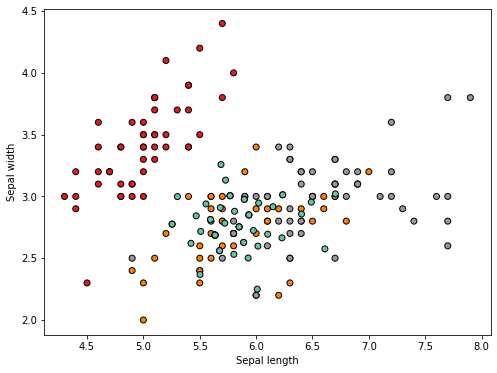

In [22]:
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.scatter(syn_x[:, 0], syn_x[:, 1], c=syn_y, cmap=plt.cm.Set2, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

#### CSwap Test for real and generated data

In [23]:
test_dev = qml.device("default.qubit", wires=2 * k + 1)

def real(x_in_l):
#     qml.Rot(phi, theta, omega, wires=0)
    real_data_len = len(x_in_l)
    for i in range(real_data_len):
        qml.RY(x_in_l[i], wires= k+i)
        
@qml.qnode(test_dev)
def cswap_test(x_in_l, gen_weights):
    qml.Hadamard(wires= 2 * k)
        
    generator(gen_weights)
    real(x_in_l)
    
    for j in range(k):
        qml.CSWAP(wires=[ 2 * k, j, k + j])
    qml.Hadamard(2 * k)
        
    return qml.probs(wires= 2 * k)

In [24]:
drawer = qml.draw(cswap_test)
print(drawer(x_in[0], gen_weights))

 0: ──H──────────RY(2.3)────╭C──RY(-0.793)──╭C──RY(-0.855)──╭C──RY(-0.589)──╭C──╭SWAP────────────┤       
 1: ──H──────────RY(0.105)──╰X──RY(0.0454)──╰X──RY(-0.283)──╰X──RY(-0.1)────╰X──│──────╭SWAP─────┤       
 2: ──RY(0.642)─────────────────────────────────────────────────────────────────├SWAP──│─────────┤       
 3: ──RY(0.739)─────────────────────────────────────────────────────────────────│──────├SWAP─────┤       
 4: ──H─────────────────────────────────────────────────────────────────────────╰C─────╰C─────H──┤ Probs 



In [25]:
test_dev.shots = 1024
avg_fid = 0
for rot_data in pca_data:
    avg_fid += cswap_test(rot_data, gen_weights)
print("Avg_Fidelity : ", avg_fid / len(pca_data))

Avg_Fidelity :  [0.979989 0.020011]


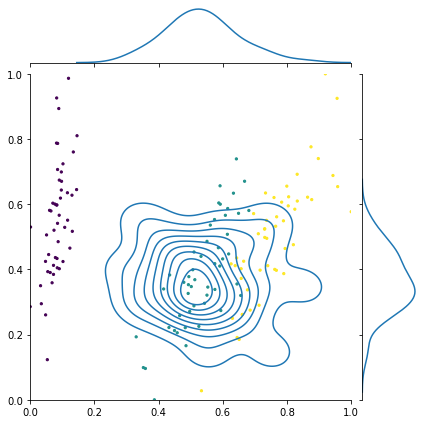

In [26]:
import seaborn as sns
generated_data = np.array(gen_datas)
graph = sns.jointplot(x=generated_data[:,0],y=generated_data[:,1],kind="kde",ylim=(0,1),xlim=(0,1))
graph.x = X[:,0]
graph.y = X[:,1]
graph.plot_joint(plt.scatter, marker='o', c=y, s=5)
plt.show()